<center>

**Mário Harvan (xharva03)**

**Tereza Burianová (xburia28)**
</center>

# Explorativní analýza
Pro účely projektu byla zvolena datová sada [Most Streamed Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/). Cílem projektu je explorativní analýza a příprava datové sady pro dolovací úlohu predikující oblíbenost skladby na základě jejich vlastností.

## Atributy datové sady
Nejprve načteme dataset z csv formátu do dataframe Pandas. Následně ukážeme prvních pár řádků datové sady, pro představu, jak datová sada vypadá. Můžeme vidět, že většina atributů je numerických, ale najdeme i kategorické. Z datové sady se můžeme o každé skladbě dozvědět jména tvůrců, název skladby, její popularitu, v kolika playlistech se vyskytuje. Dále následují vlastnosti, které specifikují typ skladby. Atributy jsou například BPM (tempo), následně percentuální vyjádření vlastností jako například akustika, energie a instrumentalita.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pprint

file_path = './spotify-2023.csv'
data = pd.read_csv(file_path, encoding='latin-1')
print("Ukázka datové sady:")
print(data.head())

Ukázka datové sady:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  1413

In [2]:
print("\nInformace o datové sadě:")
print(data.info())


Informace o datové sadě:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key           

## Převod atributů a chybějící hodnoty

V základních informacích o datasetu bylo zjištěno, že atributy *'streams'*, *'in_deezer_playlists'* a *'in_shazam_charts'*, které by měly obsahovat numerické hodnoty, jsou typu *'object'*. Pro další provedení explorativní analýzy by bylo vhodné takové atributy převést na numerické již v této fázi.

Po provedení analýzy pro atribut *'streams'* bylo zjištěno, že jedna z hodnot je chybně zadaná. Hodnota pro danou skladbu byla ručně zjištěna v aplikaci Spotify a doplněna do datové sady. Ostatní validní hodnoty byly převedeny na numerické.

U atributu *'in_deezer_playlists'* bylo zjištěno, že u vyšších hodnot je použita čárka jakožto oddělovač řádů, která zabraňuje v převedení hodnoty na numerickou. Čárky byly odstraněny a převedení atributu na numerický tak bylo umožněno.

Atribut *'in_shazam_charts'* taktéž obsahoval čárky u některých hodnot, které byly odstraněny stejným způsobem, jako při předchozím atributu. Dále také bylo zjištěno, že sloupec využívá hodnotu NaN pro vyjádření, že se skladba v žebříčku neumístila. Tyto hodnoty byly nastaveny na 0, aby atribut odpovídal ostatním atributům vyjadřujícím umístění.


In [3]:
streams = pd.to_numeric(data['streams'], errors='coerce')
print("Index nevalidní numerické hodnoty v sloupci 'streams': {}".format(streams[streams.isna()].index.values))
print("Nevalidní hodnota v sloupci 'streams': \n{}".format(data.loc[574].streams))
streams.at[574] = 215425174
data['streams'] = streams
print("Typ převedeného sloupce 'streams': {}; Počet nevalidních hodnot: {}".format(data['streams'].dtype, data['streams'].isna().sum()))

deezer_pl = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
deezer_pl_na_index = deezer_pl[deezer_pl.isna()].index.values[:5]
print("\nPříklad nevalidních numerických hodnot v sloupci 'in_deezer_playlists': ")
print(data['in_deezer_playlists'].iloc[deezer_pl_na_index])
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',', '')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
print("Typ převedeného sloupce 'in_deezer_playlists': {}; Počet nevalidních hodnot: {}".format(data['in_deezer_playlists'].dtype, data['in_deezer_playlists'].isna().sum()))

shazam_ch = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
shazam_ch_na_index = shazam_ch[shazam_ch.isna()].index.values[:5]
print("\nPříklad nevalidních numerických hodnot v sloupci 'in_shazam_charts': ")
print(data['in_shazam_charts'].iloc[shazam_ch_na_index])
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',', '')
data['in_shazam_charts'] = data['in_shazam_charts'].fillna(0)
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
print("Typ převedeného sloupce 'in_shazam_charts': {}; Počet nevalidních hodnot: {}".format(data['in_shazam_charts'].dtype, data['in_shazam_charts'].isna().sum()))

Index nevalidní numerické hodnoty v sloupci 'streams': [574]
Nevalidní hodnota v sloupci 'streams': 
BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3
Typ převedeného sloupce 'streams': float64; Počet nevalidních hodnot: 0

Příklad nevalidních numerických hodnot v sloupci 'in_deezer_playlists': 
48    2,445
54    3,394
55    3,421
65    4,053
73    1,056
Name: in_deezer_playlists, dtype: object
Typ převedeného sloupce 'in_deezer_playlists': int64; Počet nevalidních hodnot: 0

Příklad nevalidních numerických hodnot v sloupci 'in_shazam_charts': 
12    1,021
13    1,281
14      NaN
17    1,173
24    1,093
Name: in_shazam_charts, dtype: object
Typ převedeného sloupce 'in_shazam_charts': int64; Počet nevalidních hodnot: 0


Pro zajištění validity výsledků explorativní analýzy by taktéž bylo vhodné odstranění chybějících hodnot. Bylo zjištěno, že po převedení objektů na numerické hodnoty jsou chybějcí hodnoty pouze při atributu *'key'*. V grafu lze vidět rozložení klíčů pro jednotlivé stupnice. Zvláštností v tomto grafu je, že zde vůbec není zastoupen klíč "C", zatímco "C Major" byl na základě [analýzy Spotify](https://www.digitaltrends.com/music/whats-the-most-popular-music-key-spotify/) určeno jako nejzastoupenější klíč. Lze tedy usoudit, že chybějící hodnoty klíčů mohou být doplněny hodnotou "C". V grafu zobrazujícím klíče po doplnění je "C Major" vskutku nejzastoupenějším klíčem.

Chybějící hodnoty 'keys' pro jednotlivé 'modes': 
mode
Major    75
Minor    20
dtype: int64


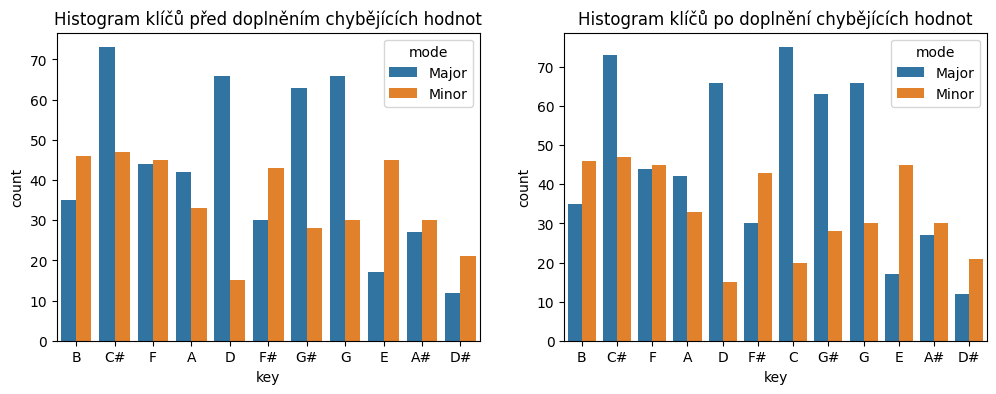

In [4]:
print("Chybějící hodnoty 'keys' pro jednotlivé 'modes': ")
print(data[data['key'].isna()].groupby('mode').size())
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
plt.title("Histogram klíčů před doplněním chybějících hodnot")
sns.countplot(x='key', hue='mode', data=data)
data['key'] = data['key'].fillna("C")
fig.add_subplot(1, 2, 2)
plt.title("Histogram klíčů po doplnění chybějících hodnot")
plt.show(sns.countplot(x='key', hue='mode', data=data))

## Rozložení hodnot atributů

Ve druhé části se podíváme na základní statistické údaje o jednotlivých atributech. Můžeme vidět počet hodnot, jejich průměr, minima, maxima a směrodatnou odchylku.

In [5]:
print("\nZákladní statistiky datové sady:")
print(data.describe())


Základní statistiky datové sady:
       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.530000e+02   
mean            5200.124869          12.009444  5.138240e+08   
std             7897.608990          19.575992  5.666418e+08   
min               31.000000           0.000000  2.762000e+03   
25%              875.000000      

Na základě statistik o atributech bylo zjištěno, že všechny z atributů vyjadřujících umístění v žebříčcích nyní obsahují nejnižší hodnotu 0, která označuje, že se skladba v daném žebříčku neumístila. Protože pro tyto atributy znamená nižší číslo lepší umístění, přítomnost nuly jakožto nejnižšího čísla by mohlo zkreslit výsledky další analýzy, například korelační matice. Proto byly hodnoty 0 nahrazeny hodnotou o jedna vyšší, než je maximální zjištěná hodnota pro daný žebříček.

In [6]:
data['in_spotify_charts'] = data['in_spotify_charts'].replace(0, 148)
data['in_apple_charts'] = data['in_apple_charts'].replace(0, 276)
data['in_deezer_charts'] = data['in_deezer_charts'].replace(0, 59)
data['in_shazam_charts'] = data['in_shazam_charts'].replace(0, 1452)

V prvním grafu jsme zkoumali popularitu skladeb ve spotify playlistech v závislosti na tempu. Z grafu vidíme, že popularita skladby nezávisí na tempu.

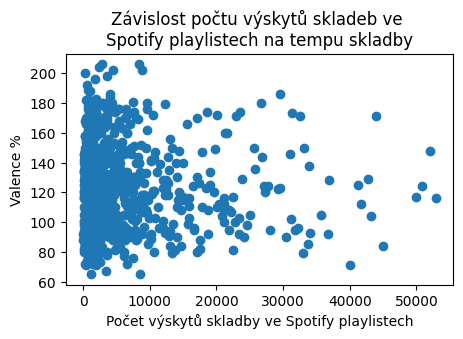

In [7]:
plt.figure(figsize=(5, 3))
plt.scatter(data['in_spotify_playlists'], data['bpm'])
plt.xlabel('Počet výskytů skladby ve Spotify playlistech')
plt.ylabel('Valence %')
plt.title('Závislost počtu výskytů skladeb ve \nSpotify playlistech na tempu skladby')
plt.show()

Ve druhém grafu jsme prozkoumali závislost popularity ve spotify a apple playlistech. V grafu pozorujeme lineární závilost, čili skladba, která je populární ve Spotify playlistu, bude populární i v Apple playlistu.

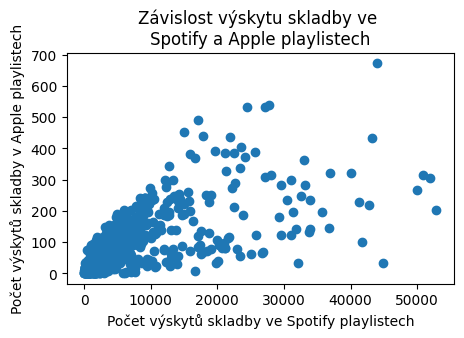

In [8]:
plt.figure(figsize=(5, 3))
plt.scatter(data['in_spotify_playlists'], data['in_apple_playlists'])
plt.xlabel('Počet výskytů skladby ve Spotify playlistech')
plt.ylabel('Počet výskytů skladby v Apple playlistech')
plt.title('Závislost výskytu skladby ve \nSpotify a Apple playlistech')
plt.show()

Třetí graf znázorňuje histogram počtu autorů skladby. Z grafu je jasně vidět, že nejvíce skladeb vytvořil právě jeden autor.

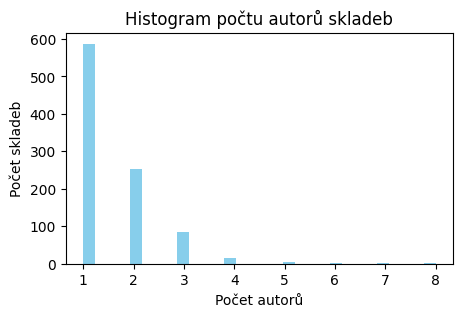

In [9]:
plt.figure(figsize=(5, 3))
plt.hist(data['artist_count'], bins=30, color='skyblue')
plt.xlabel('Počet autorů')
plt.ylabel('Počet skladeb')
plt.title('Histogram počtu autorů skladeb')
plt.show()

V krabicovém grafu zkoumáme závislost počtu přehrání skladeb na umístění ve Spotify žebříčku. Příčky, na kterých se skladby umístily, byly rozděleny do 4 skupin: 1-25, 26-50, 51-75, 76-100. Zajímavé je, že nejvíce přehrání mají skladby, které se umístily na příčkách 51-100. Očekávali bychom, že nejlépe umístěné skladby budou i nejpopulárnější.

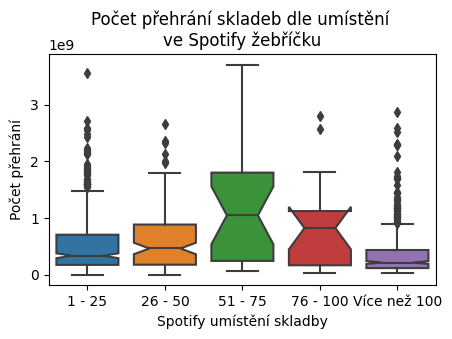

In [10]:
grouped_rankings = {
    '1 - 25': range(1, 26),
    '26 - 50': range(26, 51),
    '51 - 75': range(51, 76),
    '76 - 100': range(76, 101)
}

# Function to categorize ranks
def categorize_rank(rank):
    for group, ranks in grouped_rankings.items():
        if rank in ranks:
            return group
    return 'Více než 100'

# Apply the categorization to create a new column 'ranking_group'
data['ranking_group'] = data['in_spotify_charts'].apply(categorize_rank)

# Box plot for streams divided by Spotify chart ranking groups
plt.figure(figsize=(5, 3))
sns.boxplot(x='ranking_group', y='streams', data=data, notch=True, order=['1 - 25', '26 - 50', '51 - 75', '76 - 100', 'Více než 100'])
plt.xlabel('Spotify umístění skladby')
plt.ylabel('Počet přehrání')
plt.title('Počet přehrání skladeb dle umístění \nve Spotify žebříčku')
plt.show()

V poslední skupině grafů jsme porovnávali různé kvanitativní parametry skladeb v závislosti na počtu přehrání. Porovnali jsme podíl řeči, instrumentálů, energie a tanečnosti. Zjistili jsme, že skladby, které mají menší podíl řeči, jsou populárnější. Také jsou populárnější skladby, které mají téměř nulový podíl instrumentálů. Naopak písničky s větším podílem energie a tanečnosti jsou populárnější.

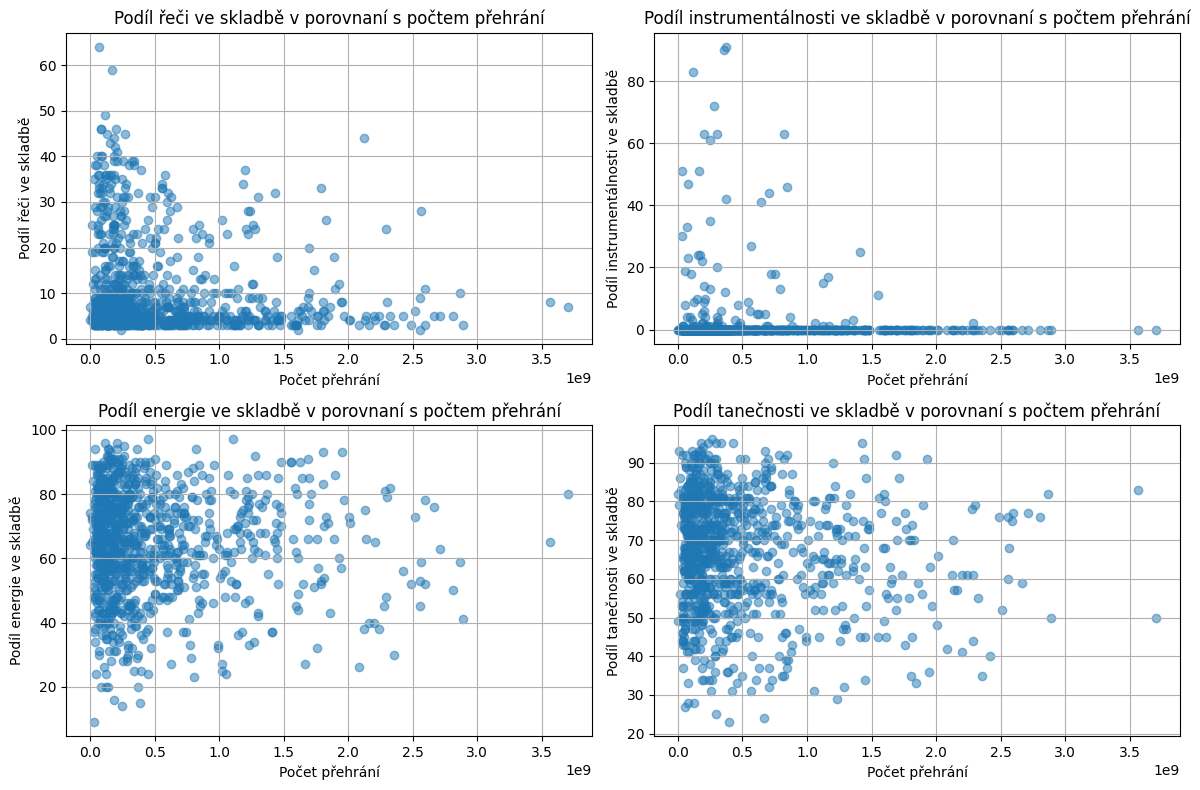

In [11]:
selected_columns = ['speechiness_%', 'instrumentalness_%', 'energy_%', 'danceability_%']
column_names = ['Podíl řeči ve skladbě', 'Podíl instrumentálnosti ve skladbě', 'Podíl energie ve skladbě', 'Podíl tanečnosti ve skladbě']

# Calculating the number of subplots needed based on selected columns
num_plots = len(selected_columns)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + 1) // num_cols if num_plots % 2 == 0 else num_plots // num_cols + 1

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if there's only one row or column in the subplot grid
if num_rows == 1 or num_cols == 1:
    axes = axes.reshape(-1)


# Generating scatter plots for selected columns
for i, column in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].scatter(data['streams'], data[column], alpha=0.5)
    axes[row][col].set_title(f'{column_names[i]} v porovnaní s počtem přehrání')
    axes[row][col].set_xlabel('Počet přehrání')
    axes[row][col].set_ylabel(column_names[i])
    axes[row][col].grid(True)
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Odlehlé hodnoty
Během analýzy odlehlých hodnot jsme nejprve analyzovali minima a maxima každého atributu. Pro percentuální atributy musely být všechny hodnoty v rozmezí 0 – 100, což dataset splňuje. Jediné, co nás zaujalo, je minimum atributu *'released_year'*, které má hodnotu 1930. Proto jsme vypsali všechny skladby, které mají rok vydání menší než 1960, a hodnoty jsme následně ověřili. Všechny hodnoty se opravdu shodují s rokem vydání, nebylo tedy nutné provádět žádné úpravy.

In [12]:
print(data.describe())

min_streams_range = 1960  # Minimum acceptable value
max_streams_range = 2023  # Maximum acceptable value

# Find out-of-range values in the 'streams' column
out_of_range_streams = data[(data['released_year'] < min_streams_range) | (data['released_year'] > max_streams_range)]
print("Out-of-range values in 'released_year' column:")
print(out_of_range_streams)

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.530000e+02   
mean            5200.124869          74.905561  5.138240e+08   
std             7897.608990          65.032793  5.666418e+08   
min               31.000000           1.000000  2.762000e+03   
25%              875.000000          11.000000  1.417210e+08   
50%

## Korelační analýza
Z korelační matice lze zjistit hned několik zajímavých informací. U skladeb lze vidět vyšší pozitivní korelace pro počet přehrání a výskyt skladeb v playlistech, ovšem v podstatě nulová korelace pro umístění skladeb v žebříčcích a počet přehrání nebo výskyt v playlistech. Lze tedy zjistit, že pro danou datovou sadu nepozorujeme ovlivnění popularity skladby jejím výskytem v žebříčku.

Další zajímavou informací je negativní korelace mezi akustičností skladby a energií skladby. Lze tak soudit, že akustické skladby jsou klidnější, naopak elektronické skladby jsou více energické.

Dále lze pozorovat pozitivní korelaci mezi vhodností skladby pro tanec, energií a valencí (pozitivitou) skladby. Z tohoto zjištění lze usoudit, že dané skladby jsou často zároveň energické, pozitivní a vhodné pro tanec.

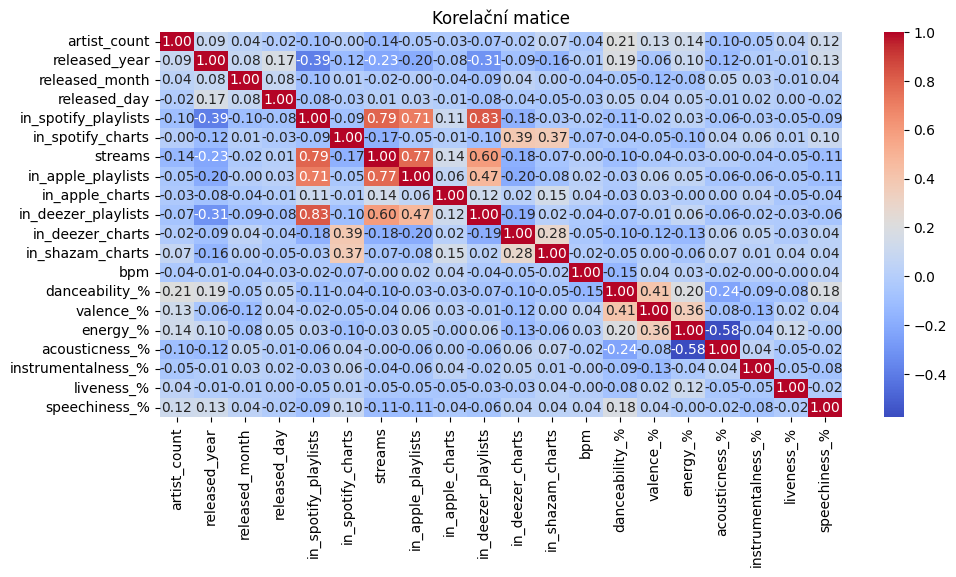

In [13]:
# Correlation matrix heatmap
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(11, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice')
plt.show()

# Příprava dat

Po explorativní analýze přichází fáze přípravy dat, kde jsou data převedena do formy vhodné pro použití dolovacím algoritmem. Tento proces zahrnuje odstranění přebytečných atributů, vypořádání se s chybějícími a odlehlými hodnotami a převedení na kategorické, případně numerické, atributy, dle potřeb daného dolovacího algoritmu. Některé z popisovaných úprav bylo třeba provést již ve fázi explorativní analýzy z důvodu získání grafů s validními daty. Pro tento projekt byla zvolena dolovací úloha predikce oblíbenosti písně na základě vlastností skladby.

## Odstranění přebytečných atributů
Fáze přípravy dat začíná odstraněním atributů, které jsou pro danou dolovací úlohu nepotřebné. V tomto případě se jedná o sloupce obsahující název skladby, jména a počet umělců a rok, měsíc a den vydání. Zbylé sloupce obsahují hodnoty znázorňující kolikrát se daná skladba vyskytuje v playlistech na různých platformách, umístění písně v různých žebříčcích, počet přehrání skladby a vlastnosti skladby. Tyto sloupce jsou plně dostačující pro získání informací pro určenou dolovací úlohu.

In [14]:
drop_cols = ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'ranking_group']
data = data.drop(drop_cols, axis=1)
print("Atributy po odstranění přebytečných informací: ")
print(list(data.columns))

Atributy po odstranění přebytečných informací: 
['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


Další fází je zpracování atributů určujících popularitu skladby - počet výskytů v playlistech, umístění v žebříčcích a počet streamů.

Atributy pro počet výskytů skladby v playlistech, jmenovitě *'in_spotify_playlists'*, *'in_apple_playlists'* a *'in_deezer_playlists'*, mohou být zkombinovány do jednoho atributu, *'in_playlists'*, sečtením všech těchto atributů.

In [15]:
playlists_sum = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
data['in_playlists'] = data[playlists_sum].sum(axis=1)
data = data.drop(columns=playlists_sum)
print(list(data.columns))

['in_spotify_charts', 'streams', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_playlists']


Při atributech znázorňujících umístění skladby v žebříčcích byly ve fázi explorativní analýzy všechny nulové hodnoty nahrazeny hodnotami o jedna vyšší, než je maximální hodnota daného atributu. Skladby, které se v daném žebříčku neumístily, jsou tak definovány jako maximální hodnota, a vztah, kdy nižší hodnota znamená lepší umístění, bude zachován i při sečtení všech atributů znázorňujících umístění v žebříčcích. Atributy *'in_spotify_charts'*, *'in_apple_charts'*, *'in_deezer_charts'* a *'in_shazam_charts'* byly tedy sečtením zkombinovány do společného sloupce *'in_charts'*.

In [16]:
charts_sum = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
data['in_charts'] = data[charts_sum].sum(axis=1)
data = data.drop(columns=charts_sum)
print(list(data.columns))

['streams', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_playlists', 'in_charts']


Posledními atributy, které mohou být kombinovány, jsou stupnice (*'mode'*) a klíč (*'key'*). Tyto hodnoty jsou vždy uváděny a analyzovány společně, neboť spolu přímo souvisí, není tedy obvykle třeba je rozdělit do dvou atributů.

In [17]:
data['scale'] = data['key'] + ' ' + data['mode'].astype(str)
data = data.drop(columns=['key','mode'])
print(list(data.columns))
print(data['scale'].head())

['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_playlists', 'in_charts', 'scale']
0     B Major
1    C# Major
2     F Major
3     A Major
4     A Minor
Name: scale, dtype: object


## Chybějící a odlehlé hodnoty
Tyto hodnoty byly řešeny již ve fázi explorativní analýzy z důvodu důležitosti jejich doplnění či odstranění pro správnost zobrazených grafů.

Nejprve se jednalo o odstranění chybějících hodnot ve fázi převádění numerických atributů z typu *'object'* na numerický typ. V datové sadě byl nesprávně zadán atribut *'streams'* u jedné z písní, kde se tato hodnota podařila ručně dohledat jako celkový počet přehrání ve Spotify aplikaci pro danou píseň. Dále byly odstraněny chybějící hodnoty atributu *'in_shazam_charts'*, kde bylo chybějící hodnotou znázorněno, že se píseň v žebříčku neumístila. Chybějící hodnoty byly doplněny hodnotou *'0'*, aby atribut souhlasil s formátem ostatních atributů popisujících umístění v žebříčcích.

Dále zbývalo doplnění chybějících hodnot atributu *'key'*, kde byl vykreslen histogram všech zastoupených klíčů. Pro doplnění byly vyhledány nejčastěji se vyskytující klíče na základě analýzy Spotify, kde nejčastějí zastoupený klíč, tedy "C Major", se v datové sadě vůbec nevyskytoval. Chybějící hocnoty tedy byly doplněny nejpravděpodobnější hodnotou.

Všechny chybějící hodnoty byly doplněny a žádný ze řádků neobsahoval více chybějících hodnot, nebo takové hodnoty, které by nebylo možné doplnit, nebylo tedy nutné odstranění žádných záznamů.

Na základě analýzy odlehlých hodnot nebyly nalezeny žádné odlehlé hodnoty, které by naznačovaly chybovost. Jediným potenciálně chybovým atributem byl rok vydání, kde byly všechny podezřelé hodnoty ověřeny jako správné. Pro přípravu dat pro určenou dolovací úlohu ovšem rok vydání není klíčový.

## Datová sada s kategorickými atributy
Pro vytvoření datové sady obsahující kategorické atributy je třeba provedení diskretizace numerických atributů. Jedním z přístupů je plnění ("binning"), kde jsou hodnoty rozděleny na základě několika intervalů, které jsou pojmenovány, což vede k převedení numerického atributu na kategorický. Rozdělení je možno provést dle šířky intervalu, kde má každý interval stejný rozsah, případně dle hloubky intervalu, kde každý interval obsahuje odpovídající množství hodnot. Pro převedení numerických atributů v použité datové sadě bylo vybráno dělení dle šířky intervalu, neboť je v daném kontextu jednodušší na pochopení a porovnání jednotlivých vlastností.

In [18]:
data_cat = data.copy()
print(data_cat.dtypes)

streams               float64
bpm                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
in_playlists            int64
in_charts               int64
scale                  object
dtype: object


In [19]:
labels = ['very_low', 'low', 'medium', 'high', 'very_high']
data_cat['danceability_%'] = pd.cut(data_cat['danceability_%'], bins=5, labels=labels)
print(data_cat['danceability_%'].head())

0      high
1      high
2       low
3    medium
4    medium
Name: danceability_%, dtype: category
Categories (5, object): ['very_low' < 'low' < 'medium' < 'high' < 'very_high']


In [20]:
data_cat['bpm'] = pd.cut(data_cat['bpm'], bins=5, labels=labels)
data_cat['valence_%'] = pd.cut(data_cat['valence_%'], bins=5, labels=labels)
data_cat['energy_%'] = pd.cut(data_cat['energy_%'], bins=5, labels=labels)
data_cat['acousticness_%'] = pd.cut(data_cat['acousticness_%'], bins=5, labels=labels)
data_cat['instrumentalness_%'] = pd.cut(data_cat['instrumentalness_%'], bins=5, labels=labels)
data_cat['liveness_%'] = pd.cut(data_cat['liveness_%'], bins=5, labels=labels)
data_cat['speechiness_%'] = pd.cut(data_cat['speechiness_%'], bins=5, labels=labels)
data_cat['in_playlists'] = pd.cut(data_cat['in_playlists'], bins=5, labels=labels)
data_cat['in_charts'] = pd.cut(data_cat['in_charts'], bins=5, labels=labels)
data_cat['streams'] = pd.cut(data_cat['streams'], bins=5, labels=labels)

Po převedení všech numerických atributů obdobným způsobem jsou všechny atributy kategorické.

In [21]:
data_cat.dtypes

streams               category
bpm                   category
danceability_%        category
valence_%             category
energy_%              category
acousticness_%        category
instrumentalness_%    category
liveness_%            category
speechiness_%         category
in_playlists          category
in_charts             category
scale                   object
dtype: object

## Datová sada s numerickými atributy
K vytvoření datové sady s numerickými atributy je třeba převedení kategorických atributů na numerické. Jednou z metod pro tento převod je "kód 1 z n" (one-hot encoding), kde je každé unikátní hodnotě přiřazena celočíselná hodnota, kterou je hodnota v novém numerickém atributu vyjádřena.

In [22]:
data_num = data.copy()
print("Před kódováním:")
print(data_num['scale'].head())
data_num['scale'] = data_num['scale'].astype('category')
map = dict(enumerate(data_num['scale'].cat.categories))
data_num['scale'] = data_num['scale'].cat.codes
print("Po kódování:")
print(data_num['scale'].head())
print("Tabulka převedených atributů:")
pprint.pprint(map)

Před kódováním:
0     B Major
1    C# Major
2     F Major
3     A Major
4     A Minor
Name: scale, dtype: object
Po kódování:
0     4
1     8
2    16
3     0
4     1
Name: scale, dtype: int8
Tabulka převedených atributů:
{0: 'A Major',
 1: 'A Minor',
 2: 'A# Major',
 3: 'A# Minor',
 4: 'B Major',
 5: 'B Minor',
 6: 'C Major',
 7: 'C Minor',
 8: 'C# Major',
 9: 'C# Minor',
 10: 'D Major',
 11: 'D Minor',
 12: 'D# Major',
 13: 'D# Minor',
 14: 'E Major',
 15: 'E Minor',
 16: 'F Major',
 17: 'F Minor',
 18: 'F# Major',
 19: 'F# Minor',
 20: 'G Major',
 21: 'G Minor',
 22: 'G# Major',
 23: 'G# Minor'}


Dalším krokem je normalizace numerických atributů. Jedním z atributů, který bude rozhodně třeba normalizovat, je atribut *'streams'*, který obsahuje velmi vysoká čísla. Dále by bylo vhodné převedení percentuálních hodnot na hodnoty v rozmezí 0 až 1. Tento převod není nutný pro všechny dolovací algoritmy, ovšem pro ukázku byl proveden. Pro normalizaci všech zmíněných atribtutů je vhodná metoda normalizace změnou dekadického měřítka, neboť z vysokých hodnot udělá nižší a percentuální hodnoty převede na měřítko 0 až 1 dělením hodnotou 100.

In [23]:
data_num['streams'] = data_num['streams'] / 1000000
data_num['danceability_%'] = data_num['danceability_%'] / 100
data_num['valence_%'] = data_num['valence_%'] / 100
data_num['energy_%'] = data_num['energy_%'] / 100
data_num['acousticness_%'] = data_num['acousticness_%'] / 100
data_num['instrumentalness_%'] = data_num['instrumentalness_%'] / 100
data_num['liveness_%'] = data_num['liveness_%'] / 100
data_num['speechiness_%'] = data_num['speechiness_%'] / 100

Po provedení normalizace lze vidět v následující tabulce, že všechny z percentuálních hodnot jsou nyní v rozmezí 0 až 1 a počet přehrání se pohybuje ve značně nižších číslech, neboť byl na základě statistických informací z explorativní analýzy vydělen řádem milionů.

In [24]:
columns = ['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
stats = data_num[columns].describe()
print(stats.loc[['min', 'max']])

         streams  danceability_%  valence_%  energy_%  acousticness_%  \
min     0.002762            0.23       0.04      0.09            0.00   
max  3703.895074            0.96       0.97      0.97            0.97   

     instrumentalness_%  liveness_%  speechiness_%  
min                0.00        0.03           0.02  
max                0.91        0.97           0.64  


Po převedení kategorického atributu a provedení normalizace jsou všechny atributy numerické, datová sada je tedy připravena.

In [25]:
data_num.dtypes

streams               float64
bpm                     int64
danceability_%        float64
valence_%             float64
energy_%              float64
acousticness_%        float64
instrumentalness_%    float64
liveness_%            float64
speechiness_%         float64
in_playlists            int64
in_charts               int64
scale                    int8
dtype: object

In [26]:
# Ulozeni nove vytvorenych datovych sad
data_num.head(50).to_csv('spotify_num.csv', index=False)
data_cat.head(50).to_csv('spotify_cat.csv', index=False)